In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Merge_Data.csv')

In [3]:
df

,Date,Tweets,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-09-19,rt ankitmadx recent high yesterday low pointna...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-09-20,daytradecoach sure study course trading im giv...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-09-21,rt kisstrade aapl really need break 117 level ...,104.54,110.19,103.10,110.08,195713800.0,0.0,0.0
3,2020-09-22,aapl amzn big tech going green httpstco1vpj8jz...,112.68,112.86,109.16,111.81,183055400.0,0.0,0.0
4,2020-09-23,usdcad target hit 150 pip profit free signal j...,111.62,112.11,106.77,107.12,150718700.0,0.0,0.0
5,2020-09-24,first thousand dollar day 1 hour work 26k week...,105.17,110.25,105.00,108.22,167743300.0,0.0,0.0
6,2020-09-25,apple finally start selling directly customer ...,108.43,112.44,107.67,112.28,149736300.0,0.0,0.0
7,2020-09-26,could resist share bear feasting aapl httpstco...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-09-27,rt sh4rizel trending alt blueprotocol low tota...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-09-28,rt popeych aapl 15min 12050 im looking bearish...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## we consider only close price 

In [4]:
# adding price column and remove unwanted column
df2=df.drop(['High','Open','Low','Volume','Dividends','Stock Splits'],axis=1)

In [5]:
df2

,Date,Tweets,Close
0,2020-09-19,rt ankitmadx recent high yesterday low pointna...,NaN
1,2020-09-20,daytradecoach sure study course trading im giv...,NaN
2,2020-09-21,rt kisstrade aapl really need break 117 level ...,110.08
3,2020-09-22,aapl amzn big tech going green httpstco1vpj8jz...,111.81
4,2020-09-23,usdcad target hit 150 pip profit free signal j...,107.12
5,2020-09-24,first thousand dollar day 1 hour work 26k week...,108.22
6,2020-09-25,apple finally start selling directly customer ...,112.28
7,2020-09-26,could resist share bear feasting aapl httpstco...,NaN
8,2020-09-27,rt sh4rizel trending alt blueprotocol low tota...,NaN
9,2020-09-28,rt popeych aapl 15min 12050 im looking bearish...,NaN


# prices are fetched but some enteries are not there due to some reason(holiday..etc) so we are replacing NAN with mean value

In [6]:
df2['Close']=df2['Close'].replace(np.NAN,np.mean(df['Close']))


In [7]:
df2

,Date,Tweets,Close
0,2020-09-19,rt ankitmadx recent high yesterday low pointna...,109.902
1,2020-09-20,daytradecoach sure study course trading im giv...,109.902
2,2020-09-21,rt kisstrade aapl really need break 117 level ...,110.080
3,2020-09-22,aapl amzn big tech going green httpstco1vpj8jz...,111.810
4,2020-09-23,usdcad target hit 150 pip profit free signal j...,107.120
5,2020-09-24,first thousand dollar day 1 hour work 26k week...,108.220
6,2020-09-25,apple finally start selling directly customer ...,112.280
7,2020-09-26,could resist share bear feasting aapl httpstco...,109.902
8,2020-09-27,rt sh4rizel trending alt blueprotocol low tota...,109.902
9,2020-09-28,rt popeych aapl 15min 12050 im looking bearish...,109.902


# adding four new column for sentimental analysis comp is "compound" it will tell whether the statement is overall positive or negative if it has negative value then it negative and if it has positive value the it is positive or if it has 0 then it is neutral

In [8]:
df2['Comp']=""
df2['Negative']=""
df2["Positive"]=""
df2['Neutral']=""

In [9]:
df2

,Date,Tweets,Close,Comp,Negative,Positive,Neutral
0,2020-09-19,rt ankitmadx recent high yesterday low pointna...,109.902,,,,
1,2020-09-20,daytradecoach sure study course trading im giv...,109.902,,,,
2,2020-09-21,rt kisstrade aapl really need break 117 level ...,110.080,,,,
3,2020-09-22,aapl amzn big tech going green httpstco1vpj8jz...,111.810,,,,
4,2020-09-23,usdcad target hit 150 pip profit free signal j...,107.120,,,,
5,2020-09-24,first thousand dollar day 1 hour work 26k week...,108.220,,,,
6,2020-09-25,apple finally start selling directly customer ...,112.280,,,,
7,2020-09-26,could resist share bear feasting aapl httpstco...,109.902,,,,
8,2020-09-27,rt sh4rizel trending alt blueprotocol low tota...,109.902,,,,
9,2020-09-28,rt popeych aapl 15min 12050 im looking bearish...,109.902,,,,


In [10]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [11]:
# finding labels for reviews
sid=SentimentIntensityAnalyzer()
sid.polarity_scores(df2['Tweets'][0])

{'neg': 0.018, 'neu': 0.867, 'pos': 0.116, 'compound': 0.9952}

In [12]:
# assing value of each tweets 
for i in range(len(df2['Tweets'])):
    value=sid.polarity_scores(df2['Tweets'][i])
    df2['Comp'][i]=value['compound']
    df2['Negative'][i]=value['neg']
    df2['Positive'][i]=value['pos']
    df2['Neutral'][i]=value['neu']

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is tryin

In [13]:
df2

,Date,Tweets,Close,Comp,Negative,Positive,Neutral
0,2020-09-19,rt ankitmadx recent high yesterday low pointna...,109.902,0.9952,0.018,0.116,0.867
1,2020-09-20,daytradecoach sure study course trading im giv...,109.902,0.9998,0.013,0.189,0.798
2,2020-09-21,rt kisstrade aapl really need break 117 level ...,110.080,0.9946,0.046,0.092,0.861
3,2020-09-22,aapl amzn big tech going green httpstco1vpj8jz...,111.810,0.9992,0.014,0.1,0.886
4,2020-09-23,usdcad target hit 150 pip profit free signal j...,107.120,0.9998,0.028,0.139,0.832
5,2020-09-24,first thousand dollar day 1 hour work 26k week...,108.220,0.9997,0.037,0.145,0.817
6,2020-09-25,apple finally start selling directly customer ...,112.280,0.9994,0.034,0.131,0.835
7,2020-09-26,could resist share bear feasting aapl httpstco...,109.902,0.9975,0.028,0.156,0.815
8,2020-09-27,rt sh4rizel trending alt blueprotocol low tota...,109.902,0.7906,0.056,0.066,0.878
9,2020-09-28,rt popeych aapl 15min 12050 im looking bearish...,109.902,0.9906,0.027,0.119,0.854


In [14]:
import seaborn as sns
df2['Tweet_type']=""
df2

,Date,Tweets,Close,Comp,Negative,Positive,Neutral,Tweet_type
0,2020-09-19,rt ankitmadx recent high yesterday low pointna...,109.902,0.9952,0.018,0.116,0.867,
1,2020-09-20,daytradecoach sure study course trading im giv...,109.902,0.9998,0.013,0.189,0.798,
2,2020-09-21,rt kisstrade aapl really need break 117 level ...,110.080,0.9946,0.046,0.092,0.861,
3,2020-09-22,aapl amzn big tech going green httpstco1vpj8jz...,111.810,0.9992,0.014,0.1,0.886,
4,2020-09-23,usdcad target hit 150 pip profit free signal j...,107.120,0.9998,0.028,0.139,0.832,
5,2020-09-24,first thousand dollar day 1 hour work 26k week...,108.220,0.9997,0.037,0.145,0.817,
6,2020-09-25,apple finally start selling directly customer ...,112.280,0.9994,0.034,0.131,0.835,
7,2020-09-26,could resist share bear feasting aapl httpstco...,109.902,0.9975,0.028,0.156,0.815,
8,2020-09-27,rt sh4rizel trending alt blueprotocol low tota...,109.902,0.7906,0.056,0.066,0.878,
9,2020-09-28,rt popeych aapl 15min 12050 im looking bearish...,109.902,0.9906,0.027,0.119,0.854,


In [15]:
for i in range(len(df2)):
    if df2['Comp'][i]>0:
        df2['Tweet_type'][i]="pos"
    else :
        df2['Tweet_type'][i]="neg"
    

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
X=df2['Comp']
Y=df2['Close']


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=0)

In [21]:
from sklearn.ensemble import RandomForestRegressor
X_train=np.array(X_train).reshape((-1,1))
Y_train=np.array(Y_train).reshape((-1,1))
X_test=np.array(X_test).reshape((-1,1))
Y_test=np.array(Y_test).reshape((-1,1))

In [22]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
pred=rf.predict(X_test)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [23]:
Y_test
pred=pd.DataFrame(pred)
X_test=pd.DataFrame(X_test)
Y_test=pd.DataFrame(Y_test)


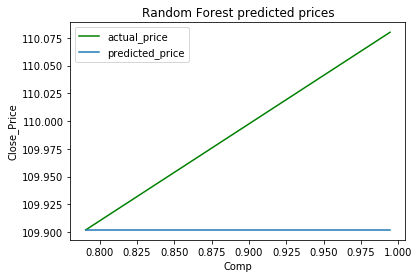

In [24]:
plt.plot(X_test,Y_test,color="green")
plt.plot(X_test,pred)
plt.xlabel("Comp")
plt.ylabel("Close_Price")
plt.title("Random Forest predicted prices")
plt.legend(labels=("actual_price","predicted_price"))
plt.savefig('random forest.png')

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
lr.predict(X_test)

array([[109.97416352],
       [116.2890349 ]])

# NOTE: Since our dataset is very small and as you can see that fetching limited tweets could only make data for just 8 days.Also the prediction is not very great in such small dataset. So we found this new dataset on internet which has the Text as "Tweets" and respective "close price" and "Adjusted close price".
Adjusted Close Price: An adjusted closing price is a stock's closing price on any given day of trading that has been amended to include any distributions and corporate actions that occurred at any time before the next day's open